# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [1]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [70]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

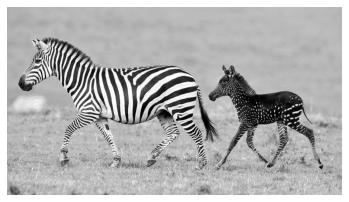

In [71]:
myimshow(zebra)

In [72]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

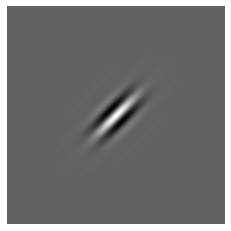

In [75]:
sinGabor = genGabor((256,256), 0.3, np.pi/4, func=np.cos) 
# cambiare func in "cos", "sin" per generare sin gabor o cos gabor
myimshow(sinGabor)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

In [149]:
# res = convolve(zebra, sinGabor)
# myimshow(res)

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

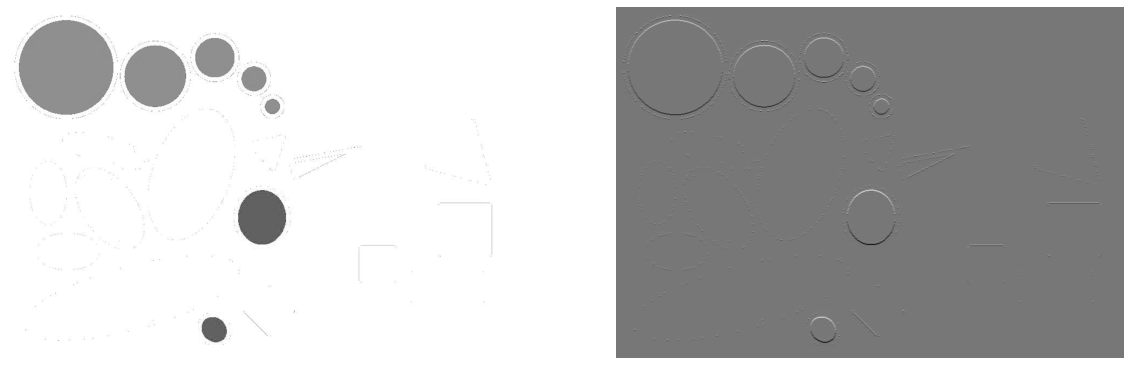

In [36]:
sobelV = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
image =  rgb2gray(imageio.imread('cerchi.jpg'))

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap='gray')
plt.axis('off')

from scipy.ndimage import convolve, correlate
image_sq = correlate(image,sobelV)
image_sq = (image_sq - np.min(image_sq))/(np.max(image_sq)- np.min(image_sq))


fig.add_subplot(1, 2, 2) 
plt.imshow(image_sq,cmap='gray')
plt.axis('off')
plt.show()

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

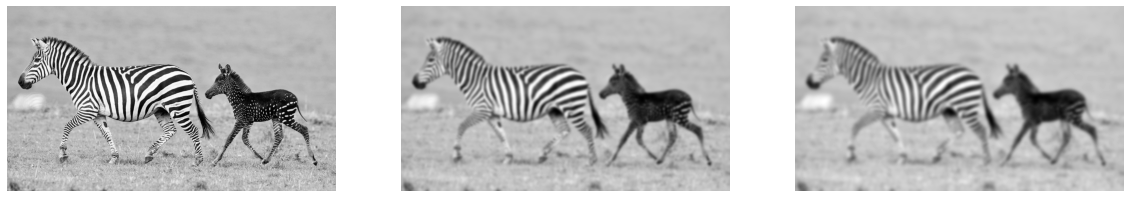

In [20]:
from scipy import ndimage
image =  rgb2gray(imageio.imread('zebra.jpg'))

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap='gray')
plt.axis('off')

blurred_image = ndimage.gaussian_filter(image, sigma=6)

fig.add_subplot(1, 3, 2) 
plt.imshow(blurred_image,cmap='gray')
plt.axis('off')

new_blurred_image = ndimage.gaussian_filter(blurred_image, sigma=6)

fig.add_subplot(1, 3, 3) 
plt.imshow(new_blurred_image,cmap='gray')
plt.axis('off')
plt.show()

# Esercizio 4

Eliminare i cerchi verdi dalla figura

![](forme.jpg)

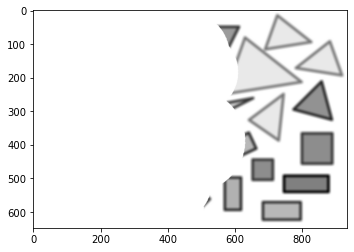

In [125]:
import numpy as np
import cv2
img = cv.imread ( 'forme.jpg' , 0)
img = cv.GaussianBlur(img, (11, 11), 5)
cimg = cv.cvtColor (img, cv.COLOR_GRAY2BGR)
cerchi = cv.HoughCircles (img, cv.HOUGH_GRADIENT, 0.9, minDist=12, param1=50, param2=30, minRadius=0, maxRadius=90)
cerchi = np.uint16 (np.around (cerchi))
for i in cerchi [0 ,:]:
    cv.circle (cimg, (i [0], i [1]), i [2], (255,255,255), 200)
plt.imshow ( cimg)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 45° in senso orario in (5, 5) e una traslazione di 50 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

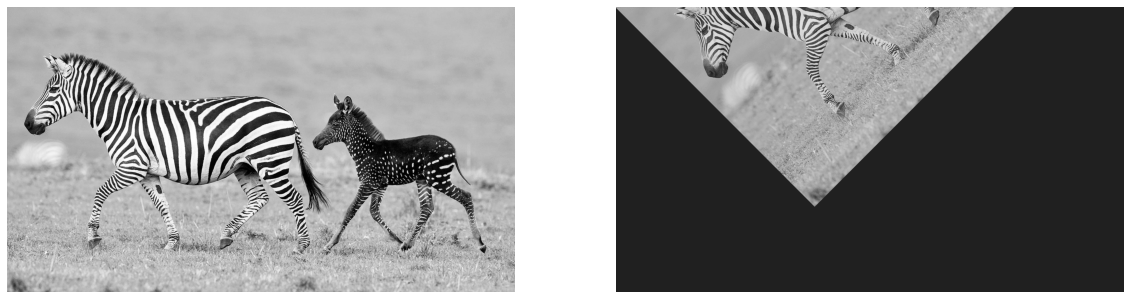

In [147]:
from scipy.ndimage import affine_transform
from scipy import linalg
src =  rgb2gray(imageio.imread('zebra.jpg'))
center=np.array((5,5))
a=np.pi/4
px=50
transform = np.array([
    [np.cos(a),-np.sin(a)],
    [px*np.sin(a),np.cos(a)]
])
offset=(center-center.dot(transform)).dot(linalg.inv(transform))
dst=affine_transform(src,trasform,order=2,offset=-offset)
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 2, 1) 
plt.imshow(src,cmap='gray')
plt.axis('off')


fig.add_subplot(1, 2, 2) 
plt.imshow(dst,cmap='gray')
plt.axis('off')
plt.show()

ho centrato l'immagine nel punto 5,5 e successivamente ho utilizzato il metodo affine_transform per utilizzare la matrice di rotazione con coefficiente alpha pari a pigreco/2 cioè 45 gradi e traslata su x di px=50